In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys

from pathlib import Path

import enclosed_csf_list

In [2]:
image_curve_path = r"C:\Users\ghage\PycharmProjects\enclosedcurveshorteningflow\out\image_curves\image_curve.pickle"

In [3]:
with open(image_curve_path, 'rb') as f:
    image_curves = pickle.load(f)

In [4]:
ecsfs = []
for image_curve in image_curves:
    try:
        sys.stdout = open(os.devnull, 'w')
        ecsf = enclosed_csf_list.enclosed_csf_list_retry_on_fail(image_curve, 100)
        sys.stdout = sys.__stdout__
        print("Algorithm complete.")
    except Exception as e:
        sys.stdout = sys.__stdout__
        print(e)
        ecsf = [image_curve]
    ecsfs.append(ecsf)

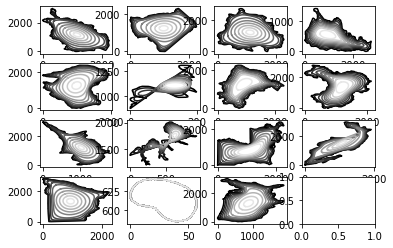

In [15]:
_, axs = plt.subplots(4, 4)
for i, ecsf in enumerate(ecsfs):
    curves = ecsf[::10]
    _ = [axs[i//4, i%4].plot(*curve.transpose(), c=(j / len(curves), )*3) for j, curve in enumerate(curves)]

In [19]:
ecsfs_file = r"out/ecsfs/ecsfs.pickle"
with open(ecsfs_file, 'wb') as f:
    pickle.dump(ecsfs, f)